In [2]:
#Load all the required python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [3]:
#Importing the data
df = pd.read_csv("https://raw.githubusercontent.com/sAKHILAREDDY/DATA606_Akhila/main/Suicide%20Rates%20Overview%201985%20to%202016%20Data.csv")

In [4]:
#To find the number of rows and columns in the DF
df.shape 

(27820, 12)

In [5]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
#renaming the column names for convenience
df.columns = ['country', 'year', 'gender', 'age', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI_for_year',
                'gdp_for_year', 'gdp_per_capita', 'generation']

In [7]:
#To get some overview of the data, To find if there are any null values- #HDI for year column contains null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI_for_year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [9]:
df.describe()

,year,suicide_count,population,suicide_rate,HDI_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [10]:
#To find duplicate values - Since there are no rows in duplicate dataframe, it exists no duplicates
duplicate = df[df.duplicated()]
duplicate

,country,year,gender,age,suicide_count,population,suicide_rate,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation


In [11]:
#To drop unwanted columns
df1=df.drop(['country-year','HDI_for_year'], axis = 1) 

In [12]:
df1['gdp_for_year'] = df1['gdp_for_year'].str.replace(',','').astype(float) #To convert the column into float

In [13]:
df1['row_num'] = df1.reset_index().index
df1

,country,year,gender,age,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation,row_num
0,Albania,1987,male,15-24 years,21,312900,6.71,2.156625e+09,796,Generation X,0
1,Albania,1987,male,35-54 years,16,308000,5.19,2.156625e+09,796,Silent,1
2,Albania,1987,female,15-24 years,14,289700,4.83,2.156625e+09,796,Generation X,2
3,Albania,1987,male,75+ years,1,21800,4.59,2.156625e+09,796,G.I. Generation,3
4,Albania,1987,male,25-34 years,9,274300,3.28,2.156625e+09,796,Boomers,4
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,6.306708e+10,2309,Generation X,27815
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,6.306708e+10,2309,Silent,27816
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,6.306708e+10,2309,Generation Z,27817
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,6.306708e+10,2309,Generation Z,27818


In [14]:
#Checking number of unique categories for categorical variables
df1.age.value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

In [15]:
df1.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [16]:
#listing countries 
df1.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [17]:
#To know the number of unique countries
len(df1.country.unique()) 

101

# **Plots to display how data is distributed**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83ac540950>,
      dtype=object)

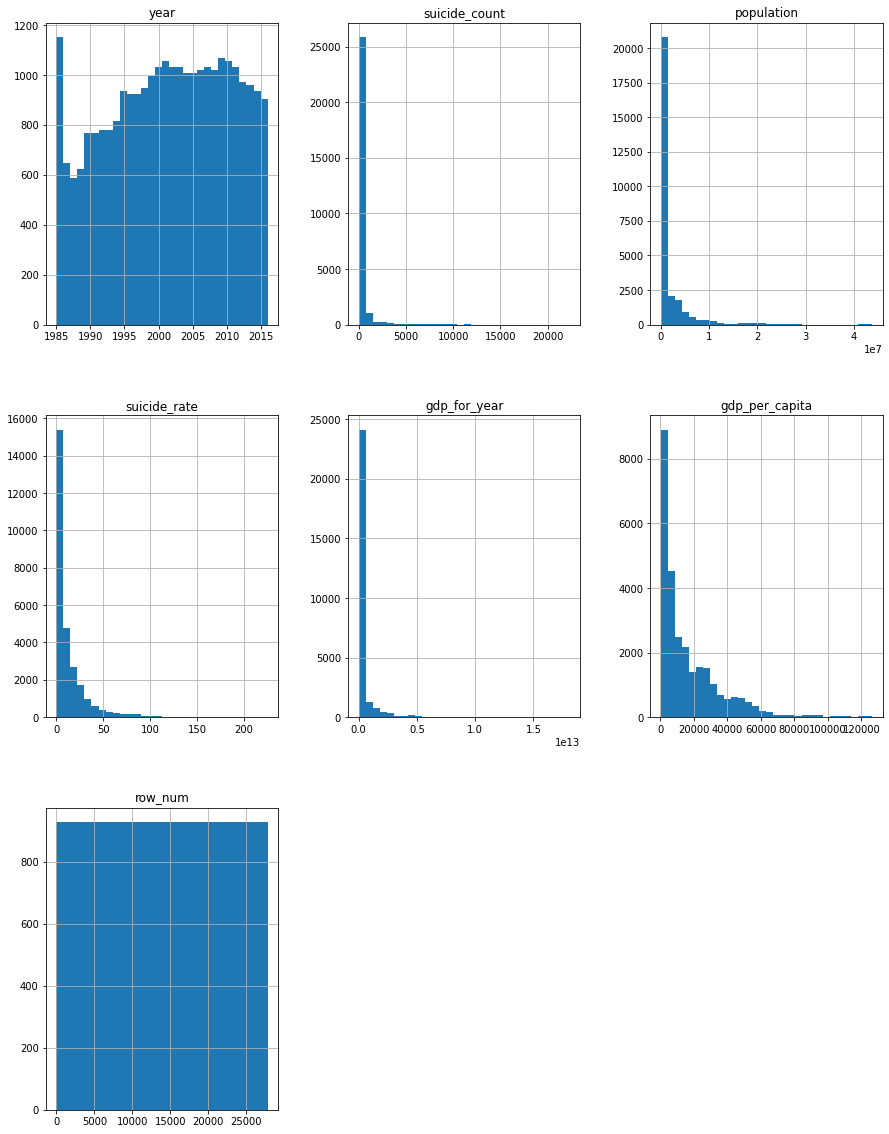

In [18]:
df1.hist(bins = 30,figsize = (15,20))

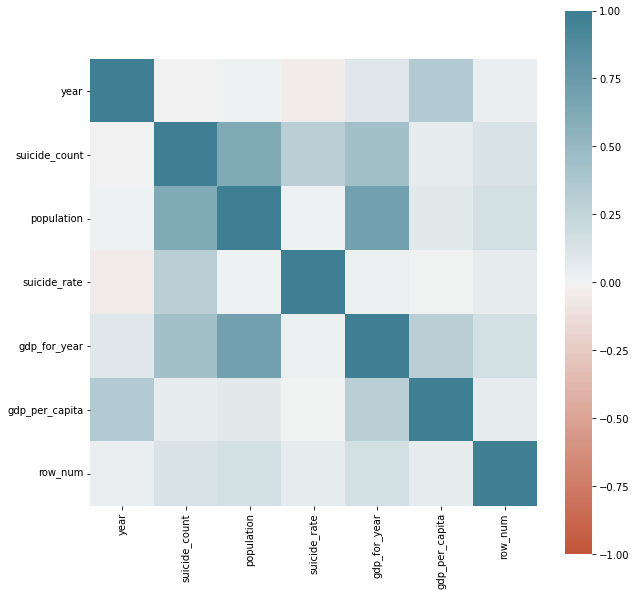

In [19]:
#Correlation heatmap

suicide_corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(suicide_corr, 
    xticklabels = suicide_corr.columns.values, # x labels
    yticklabels = suicide_corr.columns.values, # y labels
    vmin = -1, # color scale the min value
    vmax = 1, # color scale the max
    center = 0, # color scale place at the center at 0
    cmap = sns.diverging_palette(20, 220, n = 200), # color palette
    square = True) # each cell will be square-shaped
plt.show()

# **Exploratory Data Analysis** : 

Bar plot showing number of suicides in a particular year

In [20]:
suicides_no_grp = df1.groupby('year', as_index = False)['suicide_count'].sum()
suicides_no_grp.rename(columns = {'Year': 'year', 'suicide_count':'No_of_suicides_in_particular_year'}, inplace = True)
suicides_no_grp.head()

,year,No_of_suicides_in_particular_year
0,1985,116063
1,1986,120670
2,1987,126842
3,1988,121026
4,1989,160244


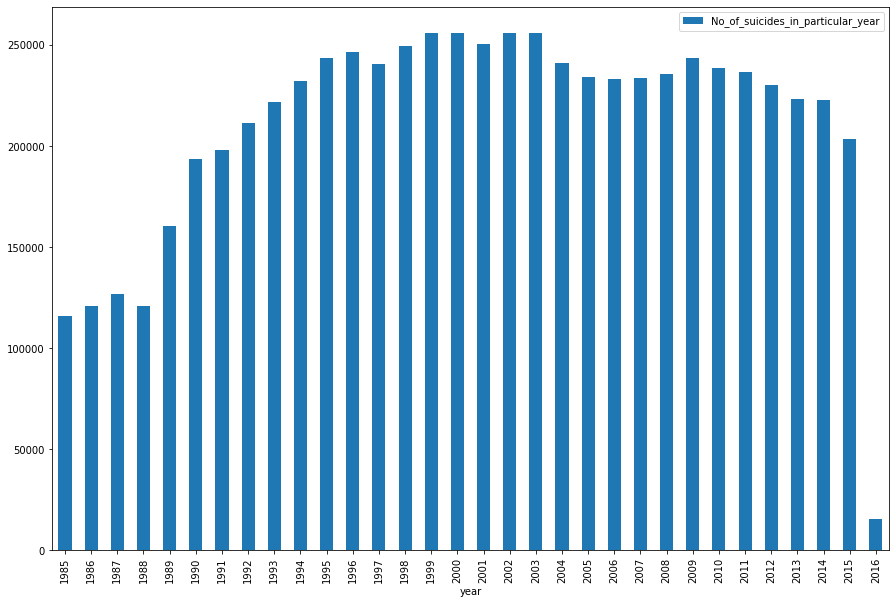

In [21]:
suicides_no_grp.plot.bar(x='year', y='No_of_suicides_in_particular_year', figsize=(15, 10))

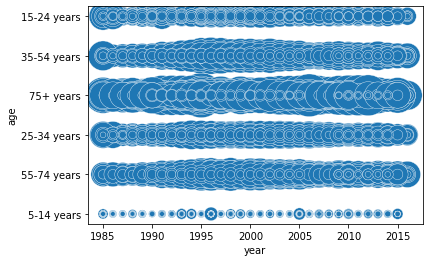

In [24]:
# use the scatterplot function to build the bubble map
sns.scatterplot(data=df1, x="year", y="age", size="suicide_rate", legend=False, sizes=(20, 2000))

# show the graph
plt.show()